In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import fiona; fiona.supported_drivers


{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

In [2]:
sataut1617 = gpd.read_file("data/satskred/SHP/AvalDet_1617_aut.shp")
sataut1718 = gpd.read_file("data/satskred/SHP/AvalDet_1718_aut.shp")
sataut1819 = gpd.read_file("data/satskred/SHP/AvalDet_1819_aut.shp")

In [3]:
sataut1617.to_excel("data/satskred/XLSX/sataut1617.xlsx")
sataut1718.to_excel("data/satskred/XLSX/sataut1718.xlsx")
sataut1819.to_excel("data/satskred/XLSX/sataut1819.xlsx")

In [3]:
sataut1617["t_0"] = pd.to_datetime(sataut1617["t_0"])
sataut1617["t_1"] = pd.to_datetime(sataut1617["t_1"])
sataut1617["season"] = '1617'
#sataut1617["date_match"] = 'No match'
sataut1617["poly_match"] = 'No match'
sataut1617.at[(10, 11, 12, 6, 8, 9, 15),'poly_match']='Match'
pd.set_option('display.max_rows', None)
print(sataut1617['poly_match'])

#sataut1617.at[(6, 9, 12, 11, 8, 11, 12, 11, 10, 15, 15),'poly_match']='Match'

0     No match
1     No match
2     No match
3     No match
4     No match
5     No match
6        Match
7     No match
8        Match
9        Match
10       Match
11       Match
12       Match
13    No match
14    No match
15       Match
16    No match
17    No match
18    No match
19    No match
20    No match
21    No match
22    No match
23    No match
Name: poly_match, dtype: object


In [4]:
sataut1718["t_0"] = pd.to_datetime(sataut1718["t_0"])
sataut1718["t_1"] = pd.to_datetime(sataut1718["t_1"])
sataut1718["season"] = '1718'
#sataut1718["date_match"] = 'No match'
sataut1718["poly_match"] = 'No match'
sataut1718.at[(11, 12, 16),'poly_match']='Match'
pd.set_option('display.max_rows', None)
print(sataut1718['poly_match'])
#sataut1718.at[(15, 9, 11, 12, 11),'poly_match']='Match'

0     No match
1     No match
2     No match
3     No match
4     No match
5     No match
6     No match
7     No match
8     No match
9     No match
10    No match
11       Match
12       Match
13    No match
14    No match
15    No match
16       Match
17    No match
18    No match
19    No match
20    No match
21    No match
22    No match
23    No match
24    No match
Name: poly_match, dtype: object


In [5]:
sataut1819 = gpd.read_file("./data/satskred/SHP/AvalDet_1819_aut.shp")
sataut1819["t_0"] = pd.to_datetime(sataut1819["t_0"])
sataut1819["t_1"] = pd.to_datetime(sataut1819["t_1"])
sataut1819["season"] = '1819'
#sat_aut1819["date_match"] = 'No match'
sataut1819["poly_match"] = 'No match'
sataut1819.at[(2, 5, 7, 9, 10, 12),'poly_match']='Match'
#sataut1819.at[(5, 5, 5, 5, 4, 2, 0, 1, 1, 0, 0, 1, 1, 2),'poly_match']='Match'

In [6]:
sataut_match = pd.concat([sataut1617, sataut1718, sataut1819])

In [15]:
for col in sataut_match.columns:
   print(col)

area
aspect
det_count
east
length
north
raster_val
refdate
sat_geom
source
t_0
t_1
time
track_id
uuid
width
dem_mean
dem_median
dem_min
dem_max
slp_mean
slp_median
slp_min
slp_max
vv1_mean
vv1_median
vv1_min
vv1_max
vh1_mean
vh1_median
vh1_min
vh1_max
vv0_mean
vv0_median
vv0_min
vv0_max
vh0_mean
vh0_median
vh0_min
vh0_max
geometry
season
poly_match


In [7]:
# Colors
blue = ['C3', 'C0']
orange = ['C3', 'C1']
green = ['C3', 'C2']
red_grey = ['C3', 'lightgrey']

In [23]:
a = 'sat_geom'
#b = 'path'
#hu = 'season'
ord = ['37', '44', '110', '117']
labels = ['37', '44', '110', '117']
#ord = [11, 12, 1, 2, 3, 4, 5]
#labels = [11, 12, 1, 2, 3, 4, 5]
xlabel = "Satellite path"
ylabel = "Count"
range = 7

df = sataut1718
#pal = paired_p
col = orange
title = "Satellite paths 2017/2018"
l_title = ""
file = "./figures/wys_sataut_result/sataut1718_satpath_stacked_t_1.png"

In [24]:
df["d"] = pd.to_datetime(df["t_1"])
df["year"] = df['d'].dt.year
df["month"] = df['d'].dt.month
df["day"] = df['d'].dt.day

c:\AnacondaNVE\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


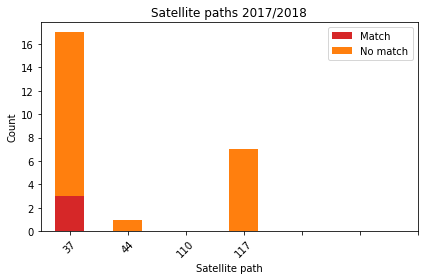

In [25]:
cp_stack = df.groupby(['poly_match', a]).size().reset_index().pivot(columns='poly_match', index=a, values=0).loc[ord]
cp_stack.plot(kind='bar', stacked=True, color=col).set_title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(np.arange(range), labels)
plt.xticks(rotation=45)
plt.legend(['Match', 'No match'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(file)

In [19]:
sataut1617.to_excel("data/satskred/XLSX_columns/sa1617.xlsx")
sataut1718.to_excel("data/satskred/XLSX_columns/sa1718.xlsx")
sataut1819.to_excel("data/satskred/XLSX_columns/sa1819.xlsx")

In [6]:
sataut = gpd.read_file("./data/satskred/SHP_merge/AvalDet_aut_merge.shp")
sataut["t_0"] = pd.to_datetime(sataut["t_0"])
sataut["t_1"] = pd.to_datetime(sataut["t_1"])

In [8]:
sataut1617_in = pd.DataFrame(sataut.iloc[[6, 9, 12, 11, 8, 11, 12, 11, 10, 15, 15],:])
sataut1718_in = pd.DataFrame(sataut.iloc[[15, 9, 11, 12, 11],:])
sataut1819_in = pd.DataFrame(sataut.iloc[[5, 5, 5, 5, 4, 2, 0, 1, 1, 0, 0, 1, 1, 2],:])

In [43]:
sataut_in = pd.concat([sataut1617_in, sataut1718_in, sataut1819_in])
print(sataut['poly_match'])

0     No match
1     No match
2     No match
3     No match
4     No match
5     No match
6        Match
7     No match
8        Match
9        Match
10       Match
11       Match
12       Match
13    No match
14    No match
15       Match
16    No match
17    No match
18    No match
19    No match
20    No match
21    No match
22    No match
23    No match
0     No match
1     No match
2     No match
3     No match
4     No match
5     No match
6     No match
7     No match
8     No match
9        Match
10    No match
11       Match
12       Match
13    No match
14    No match
15       Match
16    No match
17    No match
18    No match
19    No match
20    No match
21    No match
22    No match
23    No match
24    No match
0        Match
1        Match
2        Match
3     No match
4        Match
5        Match
6     No match
7     No match
8     No match
9     No match
10    No match
11    No match
12    No match
13    No match
14    No match
15    No match
16    No match
17    No m

In [49]:
sataut_test = gpd.read_file("data/satskred/satskred_det/AvalDet_aut_Merge_all.shp")
sataut_test["poly_match"] = 'No match'
sataut_test.at[(7, 8, 9, 10, 12, 13, 16, 36, 37, 41, 52, 55, 57, 59, 60, 62),'poly_match']='Match'

pd.set_option('display.max_rows', None)
print(sataut_test)

            area aspect  det_count      east       length      north  \
0    8179.955693   None          1  8.208209   693.156305  61.241030   
1    2493.877642   None          1  8.202517   320.765799  61.246145   
2    4987.762637   None          1  8.201793   496.255925  61.260262   
3    1596.120756   None          1  8.233580   258.389102  61.221129   
4    4289.519691   None          1  8.215947   413.574372  61.235898   
5    6683.657926   None          1  8.214985   610.678921  61.235691   
6    5885.573909   None          1  8.207976   496.845263  61.240992   
7    5187.262860   None          1  8.200354   568.095327  61.252639   
8    2094.877772   None          1  8.216027   279.472885  61.232376   
9    8279.665412   None          1  8.200156   879.265930  61.255965   
10  15162.784623   None          1  8.199630  1251.103592  61.258713   
11   2892.926362   None          1  8.214400   290.002471  61.237193   
12  11771.080986   None          1  8.199467   961.693036  61.25

In [ ]:
a = sataut_test["dem_max"]
counts, bins = np.histogram(a)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Tittel')
plt.xlabel('xlabel')
plt.show()
#plt.ylabel(ylabel)
#plt.savefig(/figures/test.png)